<a href="https://colab.research.google.com/github/dooinn/airline_satisfaction/blob/main/airline_customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project will investigate if strong correlation between the customer satisfaction rate with various variabels (Gender, Customer_Type, Age, Type_of_Travel, Class, Flight_Distance, Departure_Delay_in_Minutes, Arrival_Delay_in_Minutes).

The goals are to prepare data, followed by analystis with plots, and seek to explain the findings from the study.

The main quesiton to answer from this project is: 

+ What factors lead to customer satisfaction for an Airline?

Here are a few questions that this project will seek to answer:

+ What is the distribution of age group, gender, class, type of travel and flight distance)
+ Is there a correlation between flight distance and sataifaction rate?
+ Is there a correlation between ages and satisfaction rate?

**Data Sources**
- [Kaggle, Airline Passenger Satisfaction](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

## Import Python Modules
First import the preliminary modules that will be used in this project:

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


## Loading the Data

In [4]:
df = pd.read_csv("/content/passenger_satisfaction.csv")
df.head()


,Unnamed: 0,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


It seems that there are 103,094 observations or rows and 25 columns.

In [5]:
df.shape

(103904, 25)

In [6]:
df = df.rename({"Unnamed: 0":"order"}, axis = "columns")

In [7]:
df1=df.drop(columns=['order'], axis=1)
df1.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
def age_groups(age):
    if age <= 18:
        return '0-18'
    elif 18 < age <= 30:
        return '18-30'
    elif 30 < age <= 40:
        return '30-40'
    elif 40 < age <= 50:
        return '40-50'
    elif 50 < age <= 61:
        return '50-60'
    elif 60 < age <= 61:
        return '50-60'
    else:
        return '60>'

def transfom_distance(distance):
    if distance <= 1000:
        return '0-1000'
    elif 1000 < distance <= 2000:
        return '1000-2000'
    elif 2000 < distance <= 3000:
        return '2000-3000'
    elif 3000 < distance <= 4000:
        return '3000-4000'
    elif 4000 < distance <= 5000:
        return '4000-5000'
    else:
        return '5000>'

def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

df1['age_group'] = df1['age'].apply(age_groups)
df1['satisfaction_bool'] = df1['satisfaction'].apply(transform_satisfaction)
df1['distance_range'] = df1['flight_distance'].apply(transfom_distance)
# df2=df1.drop(columns=['Age_group'])
df1.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction,age_group,satisfaction_bool,distance_range
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0-18,0,0-1000
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,18-30,0,0-1000
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,18-30,1,1000-2000
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,18-30,0,0-1000
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,50-60,1,0-1000


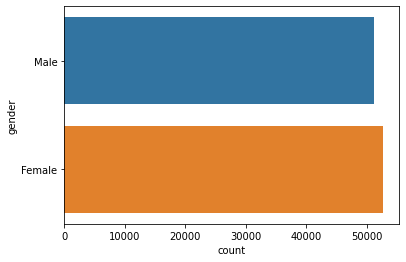

In [9]:
sns.countplot(y='gender', data=df1)

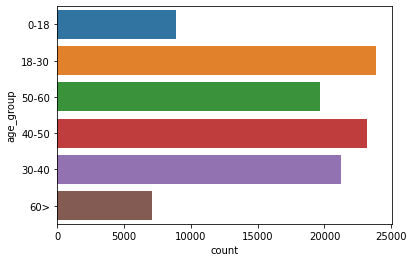

In [10]:
sns.countplot(y='age_group', data=df1)

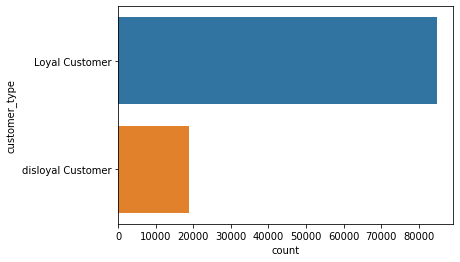

In [11]:
sns.countplot(y='customer_type', data=df1)

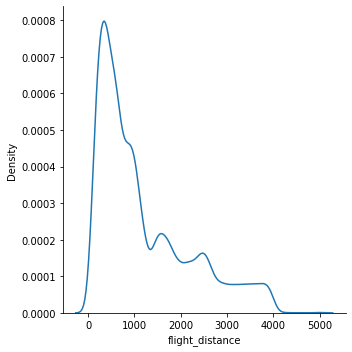

In [12]:
sns.displot(df1, x="flight_distance", kind="kde")

"Satisfied" is less than "neutral or dissatisfied". 
Why is that?

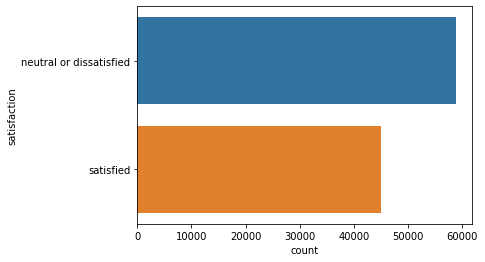

In [13]:
sns.countplot(y='satisfaction', data=df1)

In [14]:
# # Loyal customer and satisfied / unsatisfied?
df1.pivot_table('satisfaction_bool', index='distance_range',
                    columns='customer_type')

customer_type,Loyal Customer,disloyal Customer
distance_range,,
0-1000,0.362293,0.227207
1000-2000,0.497442,0.282975
2000-3000,0.667459,0.157495
3000-4000,0.776449,0.250000
4000-5000,0.576923,0.333333


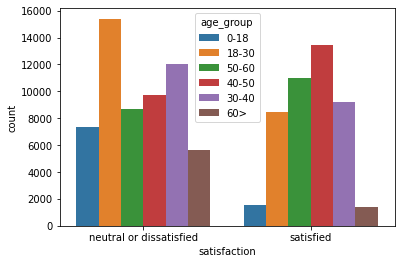

In [15]:
sns.countplot(x='satisfaction', hue='age_group', data=df1)

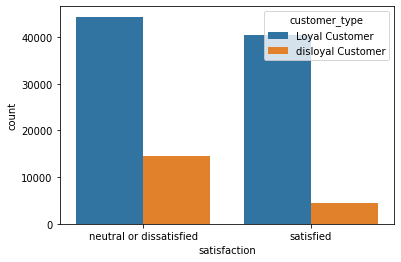

In [16]:
sns.countplot(x='satisfaction', hue='customer_type', data=df1)

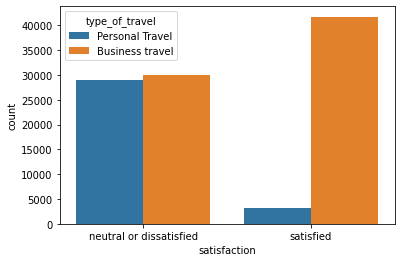

In [17]:
sns.countplot(x='satisfaction', hue='type_of_travel', data=df1)

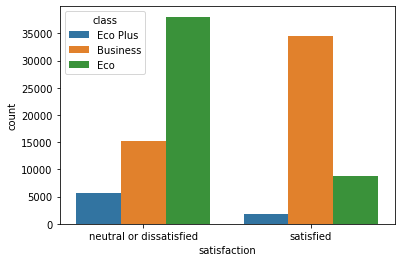

In [18]:
sns.countplot(x='satisfaction', hue='class', data=df1)

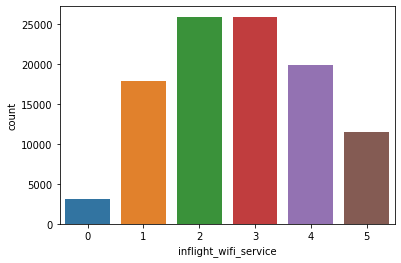

In [19]:
sns.countplot(x='inflight_wifi_service', data=df1)

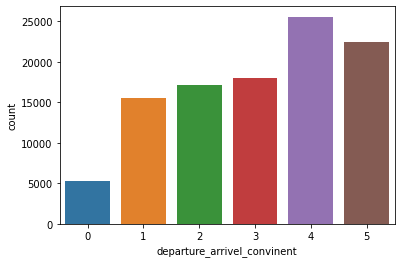

In [20]:
sns.countplot(x='departure_arrivel_convinent', data=df1)

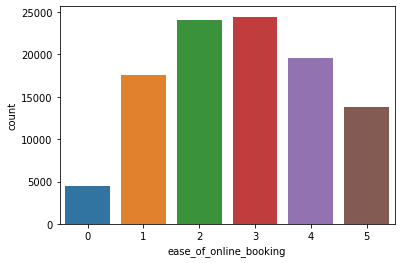

In [21]:
sns.countplot(x='ease_of_online_booking', data=df1)

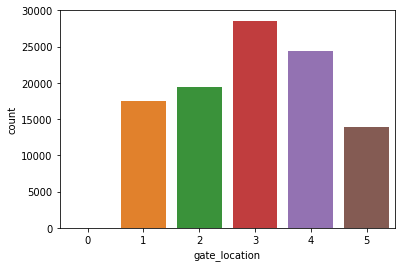

In [22]:
sns.countplot(x='gate_location', data=df1)

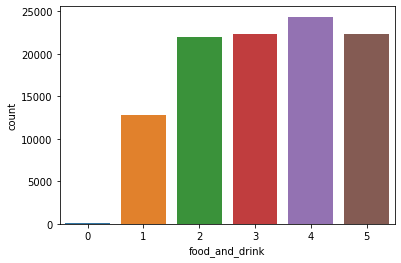

In [23]:
sns.countplot(x='food_and_drink', data=df1)

In [24]:
df1.groupby('class').mean()

,id,age,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction_bool
class,,,,,,,,,,,,,,,,,,,,
Business,69023.783248,41.574328,1675.976925,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600,14.398067,14.577272,0.694251
Eco,61606.757364,37.164253,743.439748,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097,15.160509,15.672183,0.186138
Eco Plus,58448.238591,38.654524,747.125567,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771,15.431545,16.088645,0.246064


In [25]:
df1['satisfaction_bool'].mean()

0.43333269171542965

In [26]:
df1.groupby('age_group').mean()

,id,age,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction_bool
age_group,,,,,,,,,,,,,,,,,,,,
0-18,64195.241105,13.054552,924.703334,2.590190,3.329779,2.591424,2.971714,3.042205,2.626221,3.006174,3.070939,3.205074,3.206533,3.675272,3.200584,3.693232,3.058256,15.383545,15.941309,0.172747
18-30,64027.475176,24.856801,1041.808495,2.701862,2.846822,2.734527,2.969054,3.188653,2.902927,3.147769,3.196243,3.242830,3.208068,3.679847,3.235575,3.686095,3.203455,15.147392,15.526407,0.354118
30-40,63254.681554,36.040749,1185.621610,2.745413,3.013064,2.751733,2.988869,3.201622,3.171485,3.396312,3.368344,3.368486,3.370514,3.631797,3.260529,3.643541,3.267179,15.002405,15.502295,0.433146
40-50,66194.255399,45.378292,1375.983275,2.812233,3.079271,2.841674,2.990991,3.269581,3.614509,3.714729,3.554205,3.547136,3.521660,3.659382,3.408293,3.668563,3.424717,14.803612,15.045649,0.580025
50-60,66766.494079,55.595781,1356.037103,2.765997,3.119797,2.805642,2.973977,3.252859,3.645743,3.744091,3.539568,3.542008,3.501194,3.640915,3.416264,3.639898,3.412757,14.177891,14.458970,0.558831
60>,64580.229420,66.742716,956.861669,2.580198,3.354597,2.642574,2.935644,3.088119,3.150354,3.346818,3.087553,3.133098,2.979491,3.299576,3.145120,3.319661,3.105092,14.234795,14.514123,0.198868


In [27]:
col = df1.loc[: , "inflight_wifi_service":"cleanliness"]
df1['satisfaction_mean'] = col.mean(axis=1)
df1.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction,age_group,satisfaction_bool,distance_range,satisfaction_mean
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0-18,0,0-1000,3.857143
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,18-30,0,0-1000,2.285714
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,18-30,1,1000-2000,3.714286
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,18-30,0,0-1000,3.000000
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,50-60,1,0-1000,3.500000


In [28]:
df1['satisfaction_mean'].mean()

3.2407242674556813

In [29]:
df1.groupby('class')['satisfaction_mean'].mean()

class
Business    3.430168
Eco         3.067028
Eco Plus    3.068684
Name: satisfaction_mean, dtype: float64

In [30]:
df1.groupby('gender')['satisfaction_mean'].mean()

gender
Female    3.231958
Male      3.249756
Name: satisfaction_mean, dtype: float64

In [31]:
df1.groupby('age_group')['satisfaction_mean'].mean()

age_group
0-18     3.090542
18-30    3.138838
30-40    3.227064
40-50    3.364782
50-60    3.357194
60>      3.083421
Name: satisfaction_mean, dtype: float64

In [42]:
df1.groupby('distance_range')['satisfaction_mean'].mean()

distance_range
0-1000       3.163247
1000-2000    3.280392
2000-3000    3.381171
3000-4000    3.474604
4000-5000    3.206897
Name: satisfaction_mean, dtype: float64

In [70]:
df1.groupby('class').mean()

,id,age,flight_distance,inflight_wifi_service,departure_arrivel_convinent,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_dealy_minutes,arrival_daly_minutes,satisfaction_bool,satisfaction_mean
class,,,,,,,,,,,,,,,,,,,,,
Business,69023.783248,41.574328,1675.976925,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600,14.398067,14.577272,0.694251,3.430168
Eco,61606.757364,37.164253,743.439748,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097,15.160509,15.672183,0.186138,3.067028
Eco Plus,58448.238591,38.654524,747.125567,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771,15.431545,16.088645,0.246064,3.068684


In [72]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=df1.inflight_wifi_service, y=df1.class)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df1.inflight_wifi_service, y=df1.class)
axes[1].set_xlabel("Life expectancy at birth (years)");

SyntaxError: ignored